In [1]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'paysim.csv'
path = '../Data/'

In [3]:
paysim = pd.read_csv(path+file)

In [4]:
paysim.shape

(6362620, 12)

In [5]:
paysim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             int64  
 1   transType        object 
 2   amount           float64
 3   nameOrig         object 
 4   oldbalanceOrig   float64
 5   newbalanceOrig   float64
 6   nameDest         object 
 7   oldbalanceDest   float64
 8   newbalanceDest   float64
 9   isFraud          int64  
 10  diffBalanceOrig  float64
 11  diffBalanceDest  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 582.5+ MB


In [6]:
paysim.head()

,step,transType,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest
0,1,PAYMENT,9839.64,C,170136.0,160296.36,M,0.0,0.0,0,0.0,9839.64
1,1,PAYMENT,1864.28,C,21249.0,19384.72,M,0.0,0.0,0,0.0,1864.28
2,1,TRANSFER,181.00,C,181.0,0.00,C,0.0,0.0,1,0.0,181.00
3,1,CASH_OUT,181.00,C,181.0,0.00,C,21182.0,0.0,1,0.0,21363.00
4,1,PAYMENT,11668.14,C,41554.0,29885.86,M,0.0,0.0,0,0.0,11668.14


In [7]:
# Determine Null values
paysim.isnull().sum()

step               0
transType          0
amount             0
nameOrig           0
oldbalanceOrig     0
newbalanceOrig     0
nameDest           0
oldbalanceDest     0
newbalanceDest     0
isFraud            0
diffBalanceOrig    0
diffBalanceDest    0
dtype: int64

In [8]:
print(format(paysim.transType.value_counts()),",")

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: transType, dtype: int64 ,


In [9]:
print(format(paysim.isFraud.value_counts()),",")

0    6354407
1       8213
Name: isFraud, dtype: int64 ,


In [10]:
paysim.head()

,step,transType,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest
0,1,PAYMENT,9839.64,C,170136.0,160296.36,M,0.0,0.0,0,0.0,9839.64
1,1,PAYMENT,1864.28,C,21249.0,19384.72,M,0.0,0.0,0,0.0,1864.28
2,1,TRANSFER,181.00,C,181.0,0.00,C,0.0,0.0,1,0.0,181.00
3,1,CASH_OUT,181.00,C,181.0,0.00,C,21182.0,0.0,1,0.0,21363.00
4,1,PAYMENT,11668.14,C,41554.0,29885.86,M,0.0,0.0,0,0.0,11668.14


In [11]:
paysim.transType.value_counts(normalize=True)

CASH_OUT    0.351663
PAYMENT     0.338146
CASH_IN     0.219923
TRANSFER    0.083756
DEBIT       0.006512
Name: transType, dtype: float64

<AxesSubplot:ylabel='isFraud'>

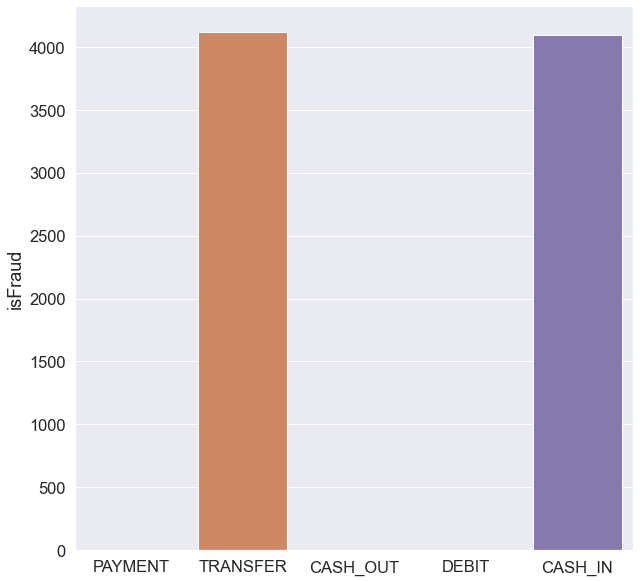

In [12]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(10,10))
sns.barplot(x=paysim.transType.unique(),y=paysim.groupby("transType")["isFraud"].sum())

<AxesSubplot:>

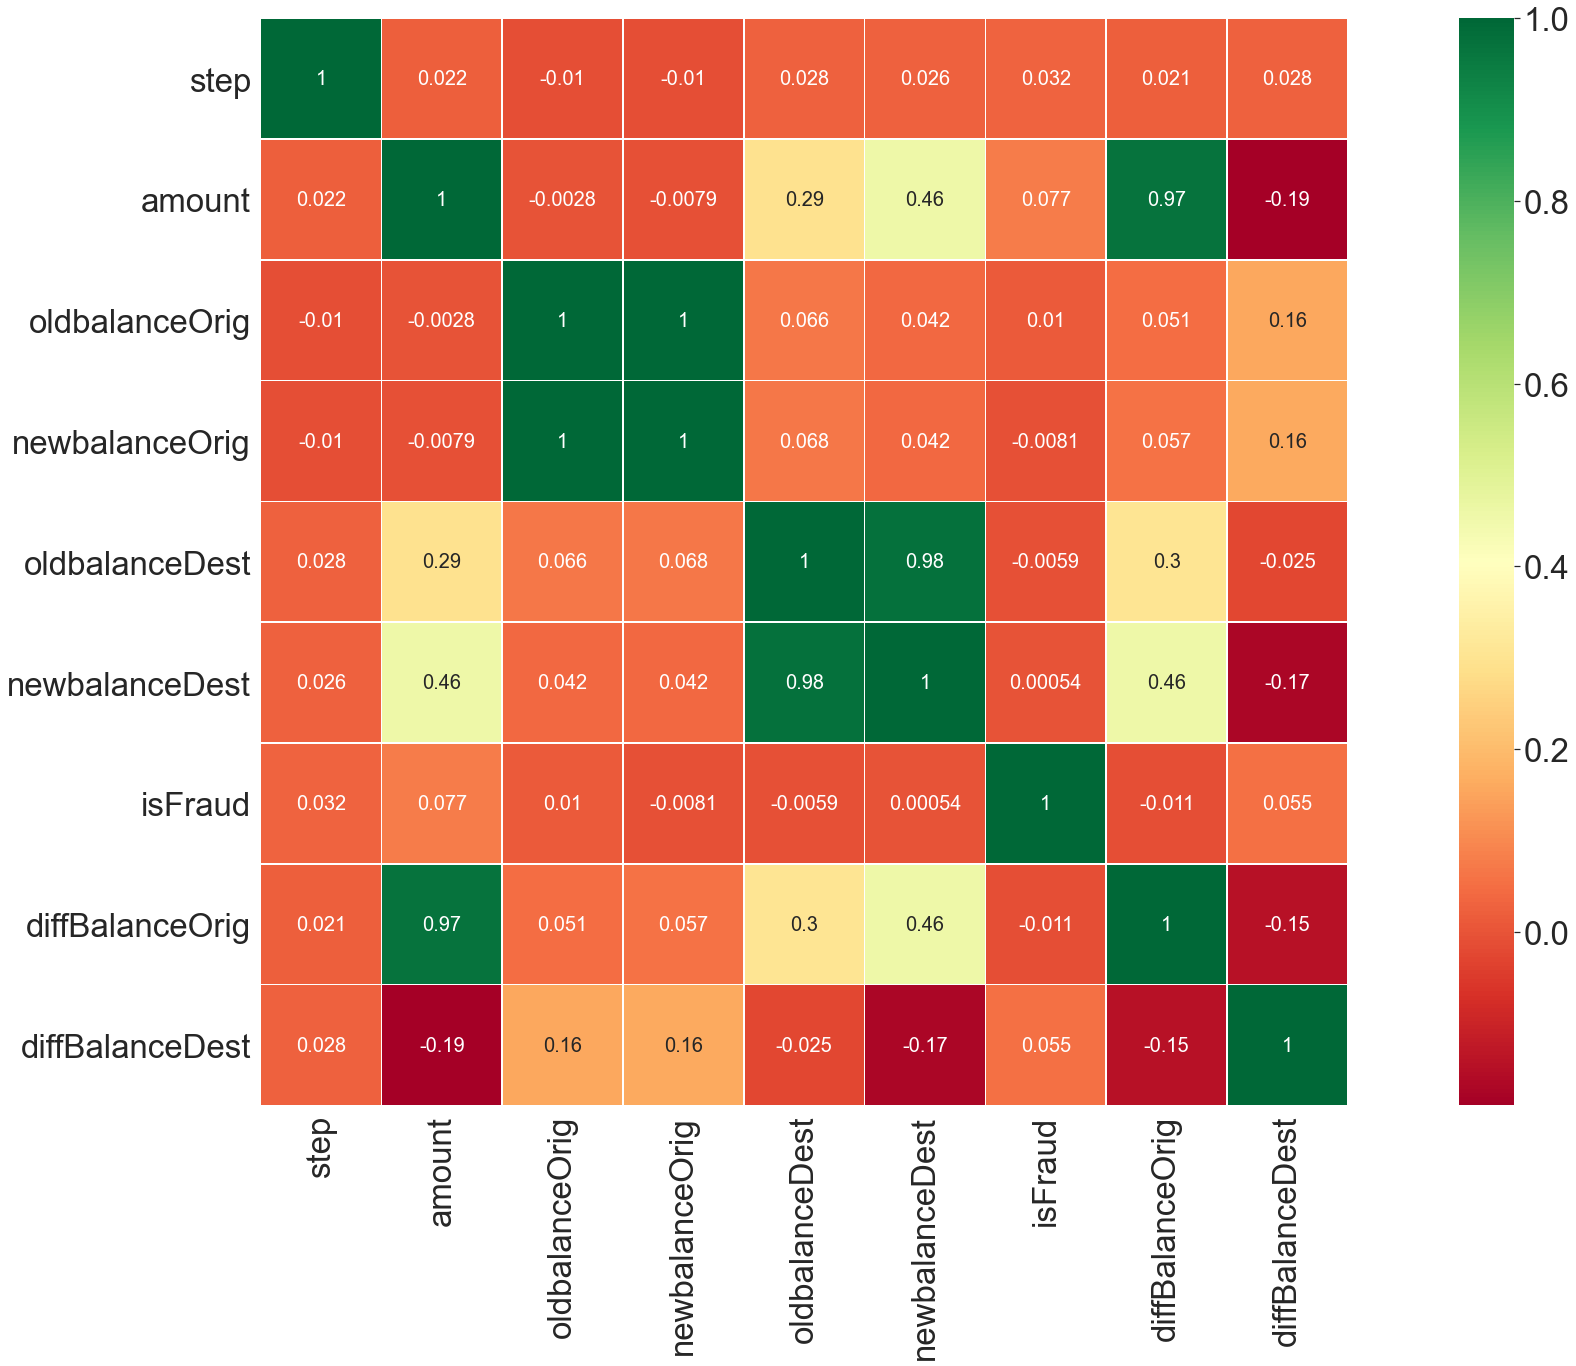

In [13]:
# Make a heatmap of the data
plt.figure(figsize=(40,20))
sns.set(font_scale = 3)
sns.heatmap(paysim.corr() ,annot=True, linewidths=.5, annot_kws={"size":20}, square=True, cmap='RdYlGn')

# Pre-Processing: 
 - Drop newbalanceOrig & newbalanceDest
 - Standardize Data
 - Upsample & Downsample

In [14]:
type(paysim)

pandas.core.frame.DataFrame

In [15]:
paysim.drop(['newbalanceOrig', 'newbalanceDest'], axis=1, inplace=True)

<AxesSubplot:>

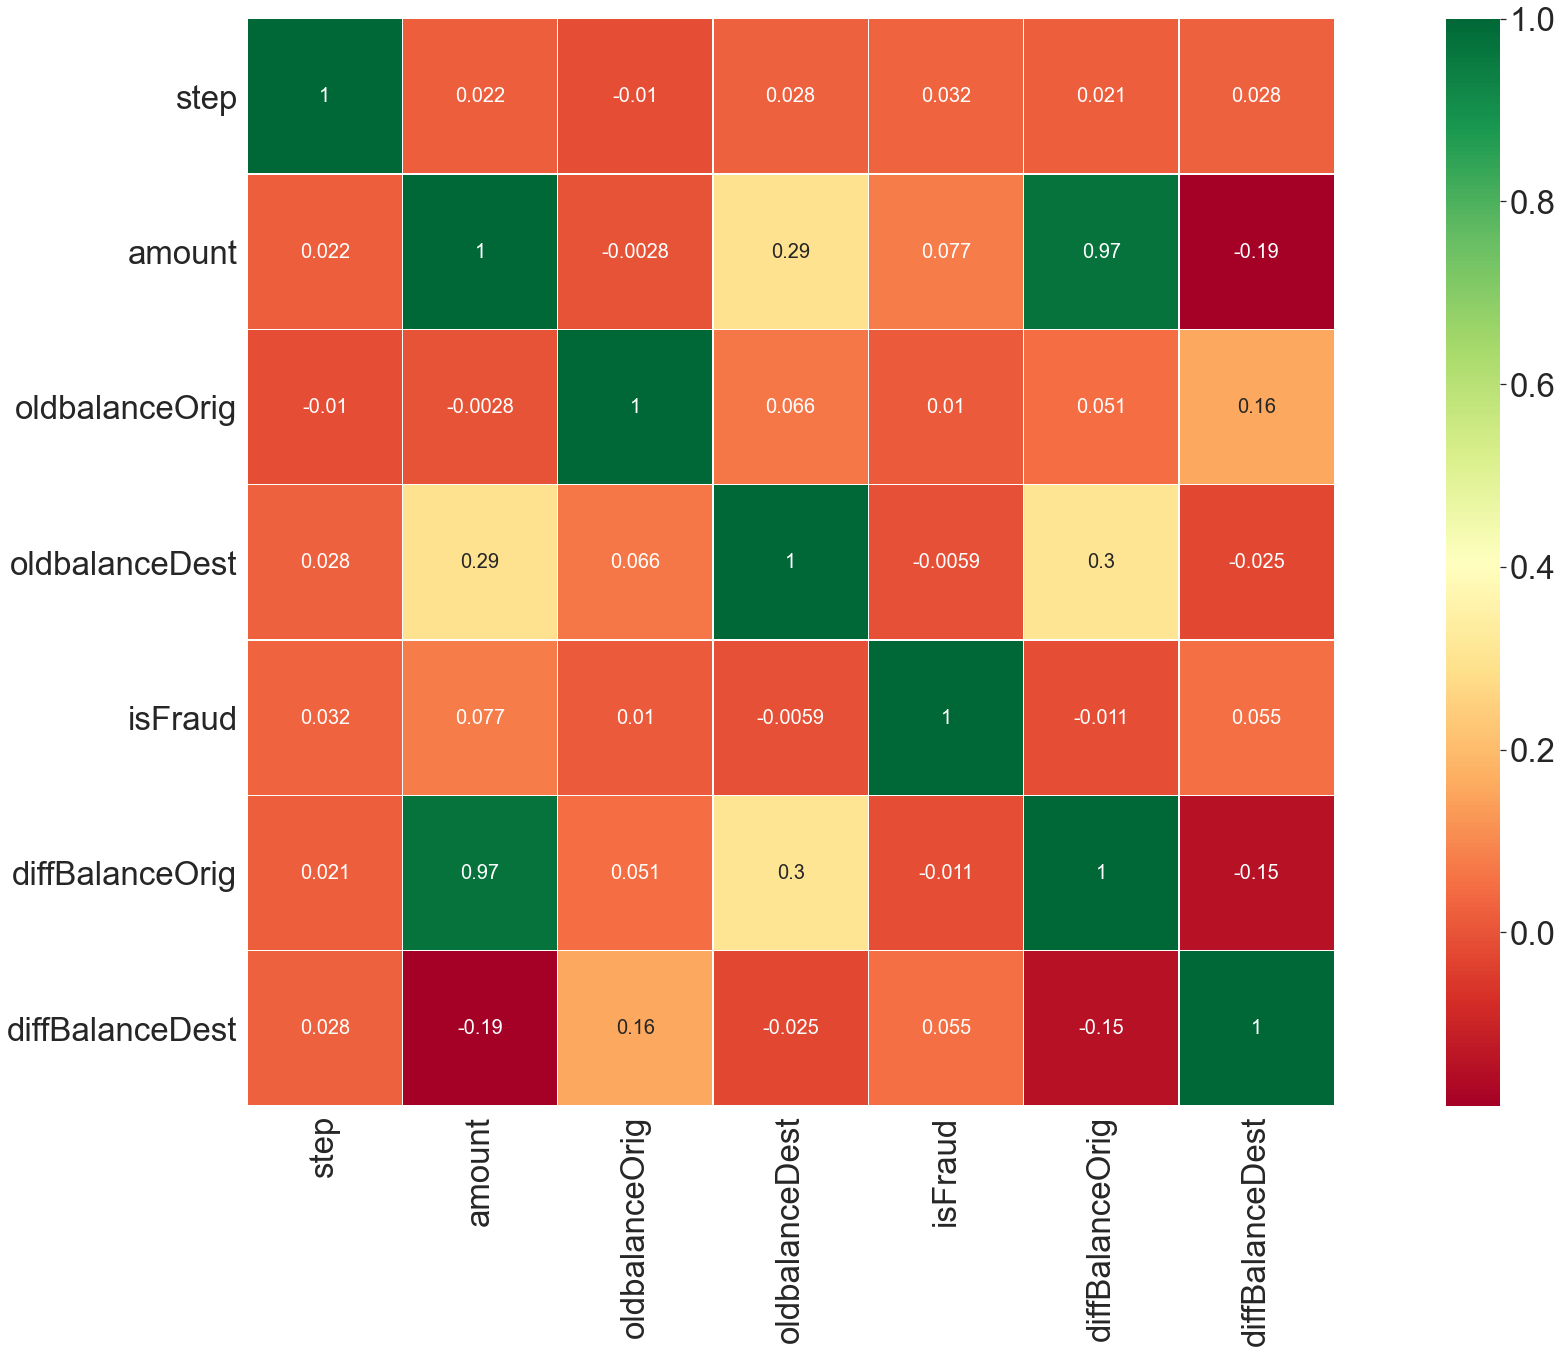

In [16]:
# Make a heatmap of the data
plt.figure(figsize=(40,20))
sns.set(font_scale = 3)
sns.heatmap(paysim.corr() ,annot=True, linewidths=.5, annot_kws={"size":20}, square=True, cmap='RdYlGn')

In [17]:
paysim.sample(10)

,step,transType,amount,nameOrig,oldbalanceOrig,nameDest,oldbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest
5055595,354,PAYMENT,13779.45,C,0.00,M,0.00,0,13779.45,1.377945e+04
4117052,302,CASH_IN,188179.00,C,2077519.64,C,3745560.61,0,376358.01,3.763580e+05
5070401,355,CASH_IN,96152.50,C,14752.00,C,0.00,0,192305.00,9.615250e+04
1047307,95,PAYMENT,4803.35,C,5443.00,M,0.00,0,0.00,4.803350e+03
3836516,282,PAYMENT,7585.26,C,5137.00,M,0.00,0,2448.26,7.585260e+03
5862579,403,CASH_OUT,123910.86,C,0.00,C,848106.52,0,123910.86,0.000000e+00
2558662,206,CASH_OUT,131259.20,C,255896.29,C,2244704.35,0,0.00,4.656613e-10
1485631,141,PAYMENT,6267.66,C,0.00,M,0.00,0,6267.66,6.267660e+03
4196034,305,PAYMENT,5152.02,C,0.00,M,0.00,0,5152.02,5.152020e+03
5138287,356,PAYMENT,6598.45,C,4857.00,M,0.00,0,1741.45,6.598450e+03


# Normalize Data:

In [18]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

cols_to_norm = ['step', 'amount', 'oldbalanceOrig', 'oldbalanceDest', 'diffBalanceOrig', 'diffBalanceDest']

scaler = StandardScaler()
paysim_norm = scaler.fit_transform(paysim[cols_to_norm])

In [19]:
paysim_norm[0:1]

array([[-1.70304158, -0.28155992, -0.22981004, -0.3238139 , -0.33147998,
        -0.10356638]])

In [20]:
paysim.loc[:,(cols_to_norm)] = paysim_norm

In [21]:
paysim.describe()

,step,amount,oldbalanceOrig,oldbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,7.860438e-13,1.500580e-15,1.412742e-13,-5.038324e-13,1.290820e-03,-2.824619e-13,-1.955975e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.590480e-02,1.000000e+00,1.000000e+00
min,-1.703042e+00,-2.978545e-01,-2.887164e-01,-3.238139e-01,0.000000e+00,-3.314800e-01,-1.719963e+02
25%,-6.140381e-01,-2.756812e-01,-2.887164e-01,-3.238139e-01,0.000000e+00,-3.266102e-01,-1.258518e-01
50%,-3.089430e-02,-1.738653e-01,-2.837972e-01,-2.847734e-01,0.000000e+00,-2.182727e-01,-1.179237e-01
75%,6.435853e-01,4.779197e-02,-2.515606e-01,-4.638324e-02,0.000000e+00,8.002734e-02,-5.937128e-02
max,3.510123e+00,1.527936e+02,2.034149e+01,1.044120e+02,1.000000e+00,1.520553e+02,2.975042e+01


In [22]:
paysim.head()

,step,transType,amount,nameOrig,oldbalanceOrig,nameDest,oldbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest
0,-1.703042,PAYMENT,-0.281560,C,-0.229810,M,-0.323814,0,-0.33148,-0.103566
1,-1.703042,PAYMENT,-0.294767,C,-0.281359,M,-0.323814,0,-0.33148,-0.121629
2,-1.703042,TRANSFER,-0.297555,C,-0.288654,C,-0.323814,1,-0.33148,-0.125442
3,-1.703042,CASH_OUT,-0.297555,C,-0.288654,C,-0.317582,1,-0.33148,-0.077468
4,-1.703042,PAYMENT,-0.278532,C,-0.274329,M,-0.323814,0,-0.33148,-0.099425


# Convert categorical variable into dummy/indicator variables

In [23]:
paysim = pd.get_dummies(paysim, drop_first=True)

In [24]:
paysim.head()

,step,amount,oldbalanceOrig,oldbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest,transType_CASH_OUT,transType_DEBIT,transType_PAYMENT,transType_TRANSFER,nameDest_M
0,-1.703042,-0.281560,-0.229810,-0.323814,0,-0.33148,-0.103566,0,0,1,0,1
1,-1.703042,-0.294767,-0.281359,-0.323814,0,-0.33148,-0.121629,0,0,1,0,1
2,-1.703042,-0.297555,-0.288654,-0.323814,1,-0.33148,-0.125442,0,0,0,1,0
3,-1.703042,-0.297555,-0.288654,-0.317582,1,-0.33148,-0.077468,1,0,0,0,0
4,-1.703042,-0.278532,-0.274329,-0.323814,0,-0.33148,-0.099425,0,0,1,0,1


In [25]:
paysim.shape

(6362620, 12)

In [26]:
# Display counts Fraud and Non Fruad
paysim.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

# Random Up/Down Sampling:

In [27]:
# class count
class_count_0, class_count_1 = paysim['isFraud'].value_counts()

# Separate class
class_0 = paysim[paysim['isFraud'] == 0]
class_1 = paysim[paysim['isFraud'] == 1]

# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (6354407, 12)
class 1: (8213, 12)


In [28]:
# Random Under-Sampling
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0: ",test_under['isFraud'].value_counts())

total class of 1 and 0:  0    8213
1    8213
Name: isFraud, dtype: int64


In [29]:
# Random Over-Sampling
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0: ",test_over['isFraud'].value_counts())

total class of 1 and 0:  0    6354407
1    6354407
Name: isFraud, dtype: int64


# Balance data with the imbalanced-learn python module

In [30]:
# 
import imblearn
from timeit import default_timer as timer 

# Random under-sampling with imblearn
from imblearn.under_sampling import RandomUnderSampler

In [31]:
y =  paysim['isFraud']
X =  paysim.loc[:, paysim.columns != 'isFraud']
# 
start = timer()

rus = RandomUnderSampler(random_state=42, replacement=True)
# fit predictor and target variable

x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', len(y))
print('Resample dataset shape', len(y_rus))
print('\n')
end = timer()
print(f'{(end - start)} seconds elapsed.')

original dataset shape: 6362620
Resample dataset shape 16426


1.7005960559999984 seconds elapsed.


In [32]:
y_rus.shape, x_rus.shape

((16426,), (16426, 11))

In [33]:
y_rus.value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

### Random over-sampling with imblearn

In [34]:
# import library
from imblearn.over_sampling import RandomOverSampler
# 
start = timer()

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', len(y))
print('Resample dataset shape', len(y_ros))
print('\n')
end = timer()
print(f'{(end - start)} seconds elapsed.')

Original dataset shape 6362620
Resample dataset shape 12708814


5.541664866000001 seconds elapsed.


In [35]:
y_ros.value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

### Under-sampling: Tomek links

In [36]:
# import library
from imblearn.under_sampling import TomekLinks
# 
start = timer()

tl = RandomUnderSampler(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = tl.fit_resample(X, y)

print('Original dataset shape', len(y))
print('Resample dataset shape', len(y_tl))
print('\n')
end = timer()
print(f'{(end - start)} seconds elapsed.')

Original dataset shape 6362620
Resample dataset shape 16426


1.635833396999999 seconds elapsed.


In [37]:
y_tl.value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

### Synthetic Minority Oversampling Technique (SMOTE)

In [38]:
# import library
from imblearn.over_sampling import SMOTE
# 
start = timer()

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(y))
print('Resample dataset shape', len(y_smote))
print('\n')
end = timer()
print(f'{(end - start)} seconds elapsed.')

Original dataset shape 6362620
Resample dataset shape 12708814


5.334676445999996 seconds elapsed.


In [39]:
y_smote.value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

### NearMiss

In [40]:
from imblearn.under_sampling import NearMiss
# 
start = timer()

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(X, y)

print('Original dataset shape:', len(y))
print('Resample dataset shape:', len(y_nm))
print('\n')
end = timer()
print(f'{(end - start)} seconds elapsed.')

Original dataset shape: 6362620
Resample dataset shape: 16426


183.957625024 seconds elapsed.


In [41]:
y_nm.value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

### Train/Test Data:

In [42]:
from sklearn.model_selection import train_test_split
# 
start = timer()
# Random Under-Sampling
x_u = test_under.loc[:, paysim.columns != 'isFraud']
y_u = test_under.isFraud

X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(x_u, y_u, test_size=0.20, random_state=42)

# Random Over-Sampling
x_o = test_over.loc[:, paysim.columns != 'isFraud']
y_o = test_over.isFraud

X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(x_o, y_o, test_size=0.20, random_state=42)

# Random under-sampling with imblearn
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size=0.20, random_state=42)

# Random over-sampling with imblearn
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros, test_size=0.20, random_state=42)

# Under-sampling: Tomek links
X_train_tl, X_test_tl, y_train_tl, y_test_tl = train_test_split(x_tl, y_tl, test_size=0.20, random_state=42)

# Synthetic Minority Oversampling Technique (SMOTE)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote, test_size=0.20, 
                                                                            random_state=42)
# NearMiss
X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(x_nm, y_nm, test_size=0.20, random_state=42)

end = timer()
print(f'{(end - start)} seconds elapsed.')

14.855726030999989 seconds elapsed.


In [43]:
# Clean Dadaset to Disk
paysim.to_csv('../Data/standardized_paysim.csv', index=False)